### Import the Neccesary Modules
This Exploratory Data Analysis would be making use of the NumPy, pandas, Seaborn and MatPlotLib modules 

and setting the plot size (width and breadth) with rcParams from PyLab.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Read in the Data
Reading in the Titanic Dataset with the pandas "read_csv" function 

and displaying the first 10 rows as shown below.

Here is a list of the column names and the information they are expected to contain:

- **Name** - Name of the passenger
- **Pclass** - Ticket class
- **Sex** - Sex/Gender of the passenger
- **Age** - Age in years
- **SibSp** - Number of siblings and spouses aboard
- **Parch** - Number of parents and children aboard
- **Ticket** - Ticket number
- **Fare** - Passenger fare
- **Cabin** - Cabin number
- **Embarked** - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
address = r'...\...\...\titanic_EDA\Datasets\titanic.csv'
titanic_data = pd.read_csv(address)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Shape of the Dataset

The shape of the Dataset can be displayed in terms of the number of rows and columns.

The output shows that there are 891 rows (A.K.A. instances) and 12 columns (A.K.A. Features).

This means that there are 11 columns describing 11 features, excluding the first column

which just indicates the index of each row, about 891 passengers that boarded the Titanic ship.

In [3]:
titanic_data.shape

(891, 12)

### Exploring and Cleaning the Data
The purpose of Exploratory Data Analysis is to understand the data and derive information from the data.

The Titanic dataset contains data about 891 passengers and indicates whether each person survived or not.

The Seaborn "countplot" function can be used to display the total count (sum) of categorical variables.

Using the "countplot" function on the dataset and setting the x-axis to the "Survived" column,

we can see the number of people that survived and the number of people that did not survive.

The output shows that just over 500 people did not survive and only just over 300 people survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

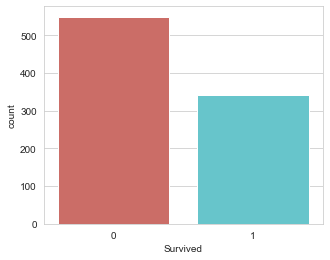

In [4]:
sb.countplot(x = 'Survived', data = titanic_data, palette = 'hls')

### Null values

The next step would be to find out how many columns contain null values and the total

number of null values for each column. 

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Columns with Null Values
All columns containing null values will be put into a separate list.

These columns will be investigated to find out if their values are "Missing At Random"

and if they hold a significant effect on the survival of the passengers.

In [6]:
null_columns_list = titanic_data.columns[titanic_data.isnull().any()].tolist()
print(null_columns_list)

['Age', 'Cabin', 'Embarked']


### Significance of Null Values
A loop can be used to iterate over the list of columns containing null values and

each column can be grouped by the average/mean of the "Survived" column and multiplied by 

100 to get the percentage of the significance of the effect of the null values on the 

survival of the passengers.

From the output, "False" means that the values are not missing and "True" means the values are missing.

Basically, if the "False" percentage is considerably greater than the "True" percentage

there's a chance that the column has a significant effect on the outcome, in this case the

outcome would be Survival.

In [7]:
for i in null_columns_list:
    group_by_average_survival = titanic_data.groupby(titanic_data[i].isnull())['Survived'].mean() * 100
    print('{}\n'.format(group_by_average_survival))

Age
False    40.616246
True     29.378531
Name: Survived, dtype: float64

Cabin
False    66.666667
True     29.985444
Name: Survived, dtype: float64

Embarked
False     38.245219
True     100.000000
Name: Survived, dtype: float64



### Filling Null Values
Since the null values in the "Age" column have significant effect on the Survival of the passengers, 

we can fill in the missing values with the average age of all the passengers.

The missing value in row 6 with PassengerId = 6 has been replaced by the average age (30).

In [8]:
titanic_data['Age'].fillna(round(titanic_data['Age'].mean()), inplace=True)
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Cabin Column
The "Cabin" column also has a significant effect on survival.

It is possible to assume that the missing values in the "Cabin" column

could mean that the particular passengers did not have a cabin.

Binary values (0 and 1) can be used to indicate if a passenger had a cabin or not.

0 means the passenger did not have a cabin and 1 means the passenger had a cabin.

A new column can be created and called "Cabin_Indicator" to contain the values.

In [9]:
titanic_data['Cabin_Indicator'] = np.where(titanic_data['Cabin'].isnull(), 0, 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Indicator
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Embarked Column
Now only the "Embarked" column has null values and this column would eventually be dropped

since it has no significant effect on survival.

The "Cabin" column would be dropped eventually since it has been replaced by the "Cabin_Indicator"

column.

In [10]:
titanic_data.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Cabin_Indicator      0
dtype: int64

### Categorical Plot
Using the Seaborn "catplot" function (categorical plot) and grouping the categories according to the amount 

of passengers that survived, the "Sibsp" and "Parch" columns can show the rate of survival

according to the number of family members (siblings, spouses, parents and children) each passenger had on board.

The two plots appear to be a little similar and so therefore, they can be combined into a single column that just 

gives the total amount of family members each passenger had on board.

<Figure size 360x288 with 0 Axes>

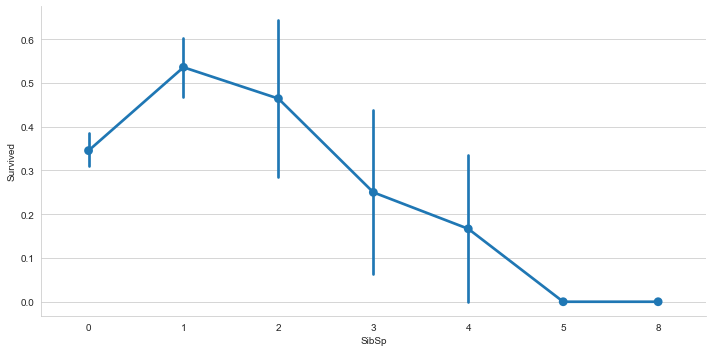

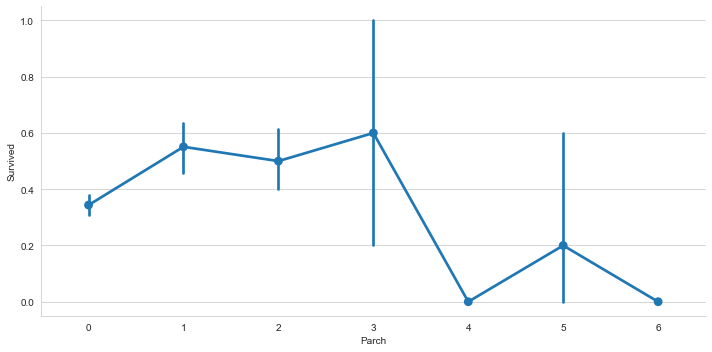

In [11]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sb.catplot(x = col, y = 'Survived', data = titanic_data, kind = 'point', aspect = 2)

### Creating a New Column
The new column will be called "Family_Count" to indicate the number of family members

each passenger had on board the Titanic ship.

In [12]:
titanic_data['Family_Count'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Indicator,Family_Count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


### Gender Category
After Exploratory Data Analysis, in order to create a machine learning model that would predict

a passenger's survival based on a few selected features/columns, the data in the "Sex" column

have to be converted to numerical values.

A gender category can be created as a dictionary and applied on the "Sex" column using the 

DataFrame ".map()" function. 0 represents "Male" and 1 represents "Female".

In [13]:
gender_category = {'male': 0, 'female': 1}

titanic_data['Sex'] = titanic_data['Sex'].map(gender_category)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Indicator,Family_Count
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


### Summary Statistics
In Exploratory Data Analysis, ".describe()" is usually used to diplay the total count, 

mean, minimum (min), maximum (max) and percentile values of each column 

in order to gain summarized information of the columns that contain numerical values.

In [14]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_Indicator,Family_Count
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.758889,0.523008,0.381594,32.204208,0.228956,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.002570,1.102743,0.806057,49.693429,0.420397,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,10.000000


### Dropping Unnecessary Columns
Finally, the columns that would not be necessary to continue with the creation of the Machine Learning

model can be dropped. The "PassengerId", "Name", and "Ticket" columns hold no real importance

in determining a passenger's survival and the "Sibsp" and "Parch" columns have been replaced 

with the "Family_Count" column. The "Cabin" column has also been replaced with the 

"Cabin_Indicator" column and it was already established that the "Embarked" column

has no significant effect on the survival rate.

In [15]:
titanic_data.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)

### Saving Cleaned Dataset
The cleaned Dataset can be written to a csv file and saved for further operations/actions.

In [16]:
titanic_data.to_csv(r'...\...\...\titanic_EDA\Datasets\clean_titanic_data.csv', index = False)